# Overview

This is a notebook to acquire a generic data understanding.

In [1]:
import pandas as pd
from ast import literal_eval
from matplotlib import pyplot as plt
from urllib.parse import urlparse

import spacy

In [2]:
spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
# Read dataframe
# Ensure that data is placed in /data
df = pd.read_csv("../data/indonesia_news_jan_may_2020.csv", index_col = 0)

# Display df dimensions
print(df.shape)

# Apply correct datatype
df['Author'] = df['Author'].apply(lambda x: literal_eval(x))
df['NormalisedDate'] = pd.to_datetime(df['NormalisedDate'])

df.head(20)

(7030, 5)


,NormalisedDate,SOURCEURL,Title,Author,Text
0,2020-04-01,https://www.aninews.in/news/national/general-n...,Eight Indonesians who attended Tablighi Jamaat...,[],"Bijnor (Uttar Pradesh) [India], Apr 1 (ANI): E..."
1,2020-04-01,https://in.news.yahoo.com/17-foreign-two-india...,"17 foreign, two Indian participants of Nizamud...",[],"Bahraich, Mar 31 (PTI) As many as 17 foreign n..."
2,2020-04-01,https://www.freepressjournal.in/india/latest-c...,Latest coronavirus update: Tamil Nadu sees big...,[],Chennai: Tamil Nadu on Tuesday saw the steepes...
3,2020-04-01,https://www.business-standard.com/article/news...,Eight Indonesians who attended Tablighi Jamaat...,[],Eight Indonesians who had participated in the ...
4,2020-04-01,https://www.thejakartapost.com/academia/2020/0...,Humanity shines,[The Jakarta Post],"Though accustomed to disasters, Indonesians ar..."
5,2020-04-01,https://www.orissapost.com/enough-of-theatrics/,Enough of theatrics,[],The unplanned manner in which Prime Minister M...
6,2020-04-01,https://www.vir.com.vn/historic-deal-augurs-tr...,Historic deal augurs trade renaissance,"[Vietnam Investment Review - Vir, Thanh Dat]",The 29th meeting of the RCEP Trade Negotiation...
7,2020-04-01,https://www.msn.com/en-in/entertainment/bollyw...,Tablighi Jamaat congregation: First link was s...,[],© Provided by The Indian Express\n\nThe connec...
8,2020-04-01,https://www.ndtv.com/video/news/news/6-who-att...,6 Who Attended Delhi Mosque Congregation Die O...,[],Six people who attended a congregation at a mo...
9,2020-04-01,https://www.businessadvantagepng.com/how-can-p...,How can Papua New Guinea fight African swine f...,"[Paul Chai, Business Advantage Png, Laura Wate...",by\n\nWith the recent death of more than 300 p...


# Date/Volume

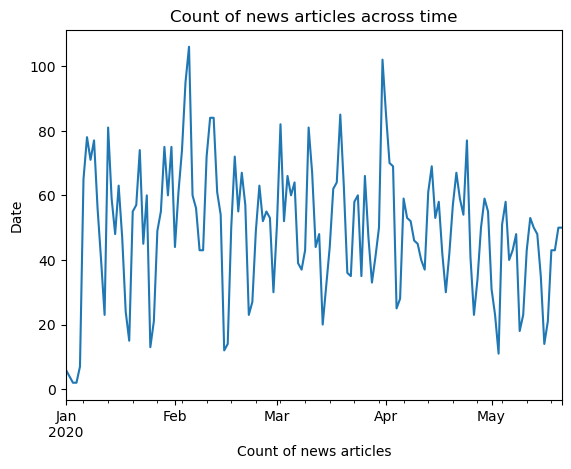

In [17]:
# Generic Trend across date
df.groupby('NormalisedDate')['Title'].count().plot()
plt.xlabel('Count of news articles')
plt.ylabel('Date')
plt.title('Count of news articles across time')

plt.show()

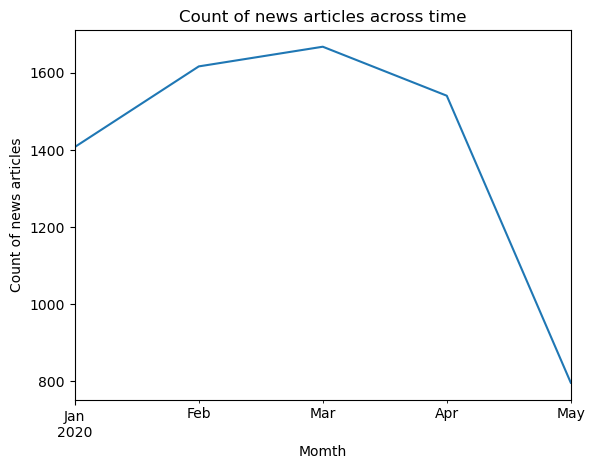

In [21]:
# Generic Trend across months
df_copy = df.copy()
df_copy['months'] = df_copy.NormalisedDate.dt.to_period('M')
df_copy.groupby('months')['Title'].count().plot()
plt.ylabel('Count of news articles')
plt.xlabel('Month')
plt.title('Count of news articles across time')

plt.show()

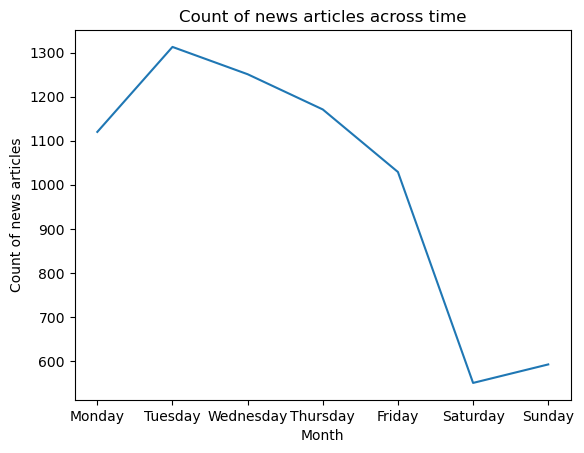

In [30]:
class_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_copy['weekday'] = df_copy.NormalisedDate.dt.day_name().astype(str)

df_grouped = df_copy.groupby('weekday')['Title'].count()
df_grouped.loc[class_list].plot()
plt.ylabel('Count of news articles')
plt.xlabel('Month')
plt.title('Count of news articles across time')

plt.show()

# URL

In [31]:
# Extract source where source is defined as 
to_filter = ['PERCENT', 'CARDINAL', 'MONEY', 'DATE',  'QUANTITY', 'ORDINAL', 'TIME']
df['source'] = df['SOURCEURL'].str.split('/').str.get(2).replace(r'www[\d]?.', '', regex=True).apply(lambda x: '.'.join(x.split('.')[:-1]) if len(x.split('.'))>1 else x)

sorted(list(df['source'].unique()))

['1460kltc.iheart',
 '325.nostate',
 '35mmc',
 '365.military',
 '680news',
 '7news.com',
 '929thebull',
 '9and10news',
 '9news.com',
 'aa.com',
 'aawsat',
 'abbynews',
 'abc.net',
 'abc11',
 'abc7news',
 'abcnews.go',
 'aberdeennews',
 'abqjournal',
 'abudhabicityguide',
 'accesswdun',
 'adaderana',
 'adelaidenow.com',
 'adgully',
 'adn',
 'adonis49.wordpress',
 'adventuretravelnews',
 'advocate',
 'aerosociety',
 'aerospace-technology',
 'aerospacemanufacturinganddesign',
 'aerotechnews',
 'aerotelegraph',
 'af.reuters',
 'afghanistantimes',
 'afr',
 'africanews',
 'afrik21',
 'agassizharrisonobserver',
 'agcanada',
 'agenda',
 'agmetalminer',
 'agriculture',
 'agupdate',
 'aidspan',
 'ainonline',
 'airdrietoday',
 'airforce-technology',
 'airport-technology',
 'akipress',
 'al-monitor',
 'alaraby.co',
 'albawaba',
 'alexinwanderland',
 'aljazeera',
 'all-noise.co',
 'allafrica',
 'allhiphop',
 'allindiaroundup',
 'am970theanswer',
 'americanmilitarynews',
 'amm',
 'amusingplanet',
 '

In [32]:
df[df['source'].str.contains('yahoo')]

,NormalisedDate,SOURCEURL,Title,Author,Text,source
1,2020-04-01,https://in.news.yahoo.com/17-foreign-two-india...,"17 foreign, two Indian participants of Nizamud...",[],"Bahraich, Mar 31 (PTI) As many as 17 foreign n...",in.news.yahoo
12,2020-04-01,https://in.news.yahoo.com/coronavirus-delhi-sh...,Coronavirus: Delhi SHOs told to check mosques,[Mahender Singh Manral],The direction came after Nalwa sent a list to ...,in.news.yahoo
47,2020-04-01,https://in.news.yahoo.com/using-tourist-visas-...,Using tourist visas in violation of the norms ...,[Vicky Nanjappa],"New Delhi, Apr 01: The Tablighi Jamaat congreg...",in.news.yahoo
77,2020-04-01,https://in.news.yahoo.com/mamata-banerjee-urge...,Mamata Banerjee Urges Centre to Sanction Rs 25...,[],Kolkata: Raising concern over the financial bu...,in.news.yahoo
144,2020-03-08,https://www.yahoo.com/news/whats-us-taliban-de...,What's inside the US deal with the Taliban to ...,[Conor Finnegan],In a historic signing ceremony with the top U....,yahoo
...,...,...,...,...,...,...
6863,2020-03-04,https://au.news.yahoo.com/indonesia-seizes-hal...,Indonesia seizes half a million virus masks am...,[],Vendors wearing outfits of local superhero Gun...,au.news.yahoo
6894,2020-03-04,https://uk.news.yahoo.com/hospitals-indonesia-...,Hospitals in Indonesia prepare for coronavirus,[],After two cases of coronavirus were confirmed ...,uk.news.yahoo
6898,2020-03-04,https://uk.news.yahoo.com/smokey-bandits-indon...,Smokey and the bandits: Indonesian police burn...,[],Police in the Aceh Province of Indonesia burne...,uk.news.yahoo
6970,2020-01-19,https://uk.news.yahoo.com/philippine-military-...,Philippine military says five Indonesians kidn...,[],MANILA (Reuters) - The Philippine military on ...,uk.news.yahoo


In [34]:
df[df['Author'].str.len()==0].shape[0]/len(df) # Large percentage of author field is missing

0.4914651493598862

# Article

In [ ]:
# Check for duplicated entries


In [74]:
"""
# If cleaning required
df_cleaned = df.copy()
url_pattern = re.compile(r'\n.*http.*')
df_cleaned['Text'] = df_cleaned['Text'].apply(lambda x: re.sub(url_pattern, '', x))
df_cleaned.head()
"""

,NormalisedDate,SOURCEURL,Title,Author,Text,source
0,2020-04-01,https://www.aninews.in/news/national/general-n...,Eight Indonesians who attended Tablighi Jamaat...,[],"Bijnor (Uttar Pradesh) [India], Apr 1 (ANI): E...",aninews
1,2020-04-01,https://in.news.yahoo.com/17-foreign-two-india...,"17 foreign, two Indian participants of Nizamud...",[],"Bahraich, Mar 31 (PTI) As many as 17 foreign n...",in.news.yahoo
2,2020-04-01,https://www.freepressjournal.in/india/latest-c...,Latest coronavirus update: Tamil Nadu sees big...,[],Chennai: Tamil Nadu on Tuesday saw the steepes...,freepressjournal
3,2020-04-01,https://www.business-standard.com/article/news...,Eight Indonesians who attended Tablighi Jamaat...,[],Eight Indonesians who had participated in the ...,business-standard
4,2020-04-01,https://www.thejakartapost.com/academia/2020/0...,Humanity shines,[The Jakarta Post],"Though accustomed to disasters, Indonesians ar...",thejakartapost


## NER

In [81]:
to_filter = ['PERCENT', 'CARDINAL', 'MONEY', 'DATE',  'QUANTITY', 'ORDINAL', 'TIME']
df['ner'] = df['Text'].apply(lambda x: [ str(entity) for entity in nlp(x).ents if str(entity.label_) not in to_filter])
df.to_csv('../data/df_cleaned.csv')
df.head()

,NormalisedDate,SOURCEURL,Title,Author,Text,source,ner
0,2020-04-01,https://www.aninews.in/news/national/general-n...,Eight Indonesians who attended Tablighi Jamaat...,[],"Bijnor (Uttar Pradesh) [India], Apr 1 (ANI): E...",aninews,"[India, ANI, Indonesians, Nizamuddin, Nagina, ..."
1,2020-04-01,https://in.news.yahoo.com/17-foreign-two-india...,"17 foreign, two Indian participants of Nizamud...",[],"Bahraich, Mar 31 (PTI) As many as 17 foreign n...",in.news.yahoo,"[Bahraich, PTI, Indonesia, Thailand, Indian Mu..."
2,2020-04-01,https://www.freepressjournal.in/india/latest-c...,Latest coronavirus update: Tamil Nadu sees big...,[],Chennai: Tamil Nadu on Tuesday saw the steepes...,freepressjournal,"[Tamil Nadu, Health, Beela Rajesh, Delhi Nizam..."
3,2020-04-01,https://www.business-standard.com/article/news...,Eight Indonesians who attended Tablighi Jamaat...,[],Eight Indonesians who had participated in the ...,business-standard,"[Indonesians, Nizamuddin, Nagina, Sanjay Singh..."
4,2020-04-01,https://www.thejakartapost.com/academia/2020/0...,Humanity shines,[The Jakarta Post],"Though accustomed to disasters, Indonesians ar...",thejakartapost,"[Indonesians, COVID-19, the Health Quarantine ..."


## Sentiments

## Keywords


# Topic Modelling